# Level-3_Task-1

## Predictive Modeling
Build a regression model to predict the aggregate rating of a restaurant based on available features. 

Split the dataset into training and testing sets and evaluate the model's performance using appropriate metrics.

Experiment with different algorithms (e.g., linear regression, decision trees, random forest) and compare their performance.

In [17]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings

warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('Dataset.csv')

In [4]:
data.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [5]:
data['Restaurant Name Length'] = data['Restaurant Name'].apply(len)
data['Address Length'] = data['Address'].apply(len)
data['Has Table Booking'] = data['Has Table booking'].map({'Yes': 1, 'No': 0})
data['Has Online Delivery'] = data['Has Online delivery'].map({'Yes': 1, 'No': 0})

In [6]:
X = data[['Average Cost for two', 'Restaurant Name Length', 'Address Length', 'Has Table Booking', 'Has Online Delivery']]
y = data['Aggregate rating']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [9]:
decision_tree_reg = DecisionTreeRegressor(random_state=42)
decision_tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [10]:
random_forest_reg = RandomForestRegressor(random_state=42)
random_forest_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [11]:
def evaluate_regression_model(model, X_test, y_test):
    """
    Evaluate a regression model's performance.

    Parameters:
    - model: The trained regression model to be evaluated.
    - X_test: The input features for testing.
    - y_test: The true target values for testing.

    Returns:
    - mse: Mean Squared Error (MSE) between predicted and true values.
    - r2: R-squared (R2) score indicating model's goodness of fit.
    """
    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)

    # Calculate R-squared (R2) score
    r2 = r2_score(y_test, y_pred)

    return mse, r2


In [14]:
def print_evaluation_results(model_name, mse, r2):
    print(f'{model_name} - MSE: {mse}, R-squared: {r2}')

In [15]:
models = [
    ("Linear Regression", linear_reg),
    ("Decision Tree", decision_tree_reg),
    ("Random Forest", random_forest_reg)
]

In [16]:
for model_name, model in models:
    mse, r2 = evaluate_regression_model(model, X_test, y_test)
    print_evaluation_results(model_name, mse, r2)

Linear Regression - MSE: 2.09781715516153, R-squared: 0.07833185313490254
Decision Tree - MSE: 3.2696037821966395, R-squared: -0.4364882332598976
Random Forest - MSE: 2.011758550763726, R-squared: 0.11614138016730635


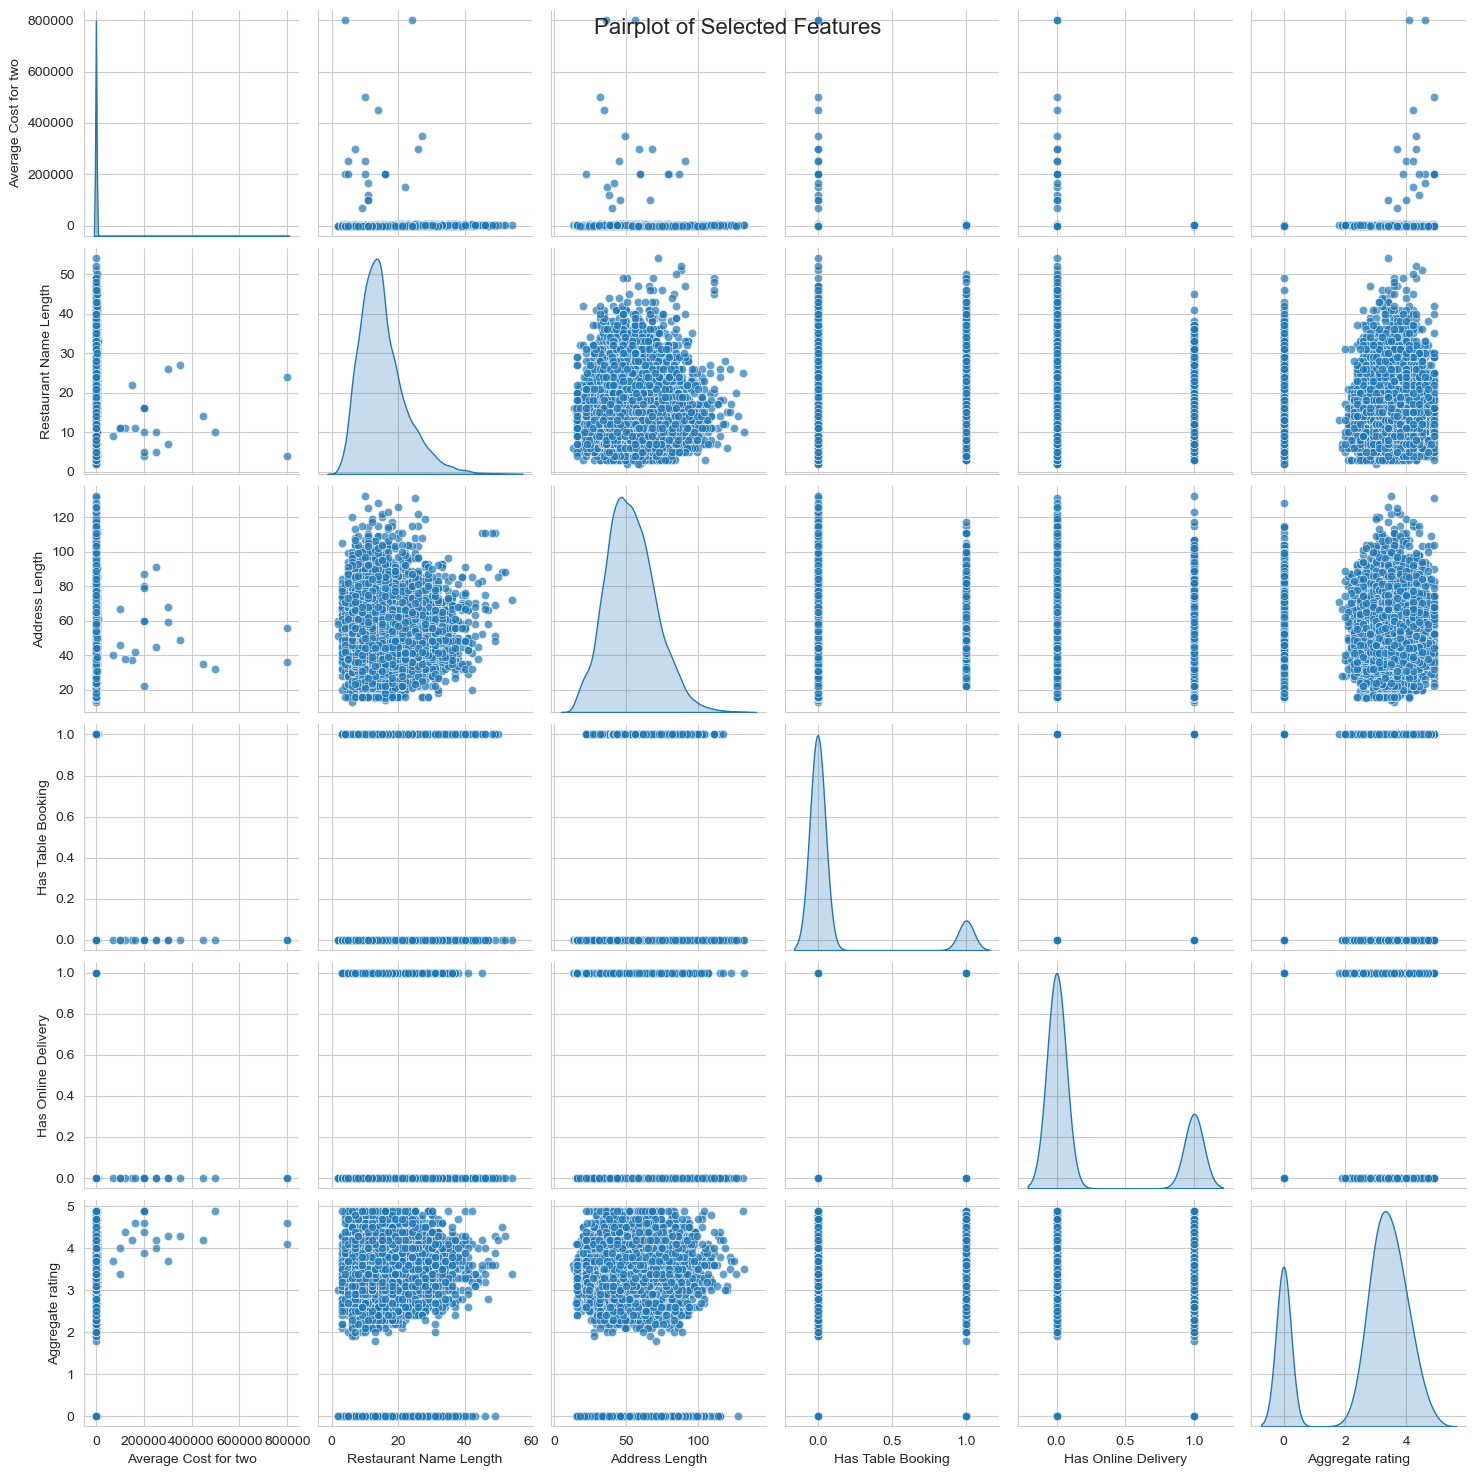

In [22]:
# Assuming the correct column names are present in your DataFrame
selected_columns = [
    'Average Cost for two',
    'Restaurant Name Length',
    'Address Length',
    'Has Table Booking',
    'Has Online Delivery',
    'Aggregate rating'
]

# Select the columns of interest
selected_data = data[selected_columns]

# Set a pleasant style for the plot
sns.set_style("whitegrid")

# Create a pairplot with enhanced aesthetics
pairplot = sns.pairplot(selected_data, diag_kind='kde', plot_kws={'alpha': 0.7})

# Customize the title
pairplot.fig.suptitle('Pairplot of Selected Features', fontsize=16)

# Show the plot
plt.show()

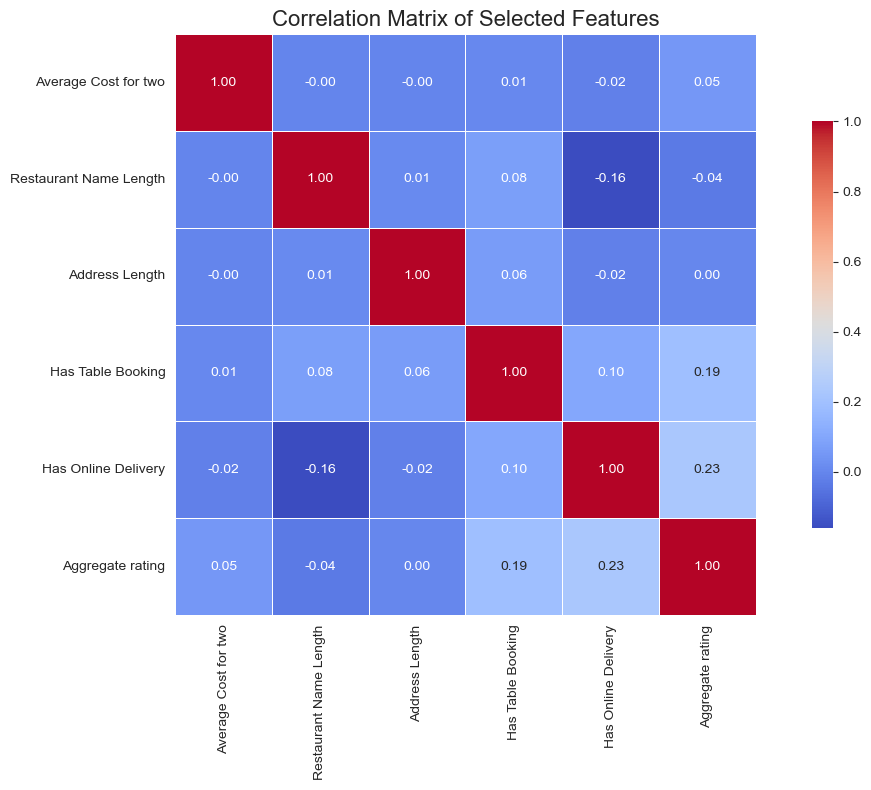

In [24]:
# Assuming the correct column names are present in your DataFrame
selected_columns = [
    'Average Cost for two',
    'Restaurant Name Length',
    'Address Length',
    'Has Table Booking',
    'Has Online Delivery',
    'Aggregate rating'
]

# Calculate the correlation matrix for the selected columns
corr = data[selected_columns].corr()

# Set a pleasant style for the plot
sns.set_style("whitegrid")

# Create a correlation heatmap with enhanced aesthetics
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=.5, fmt=".2f", square=True, cbar_kws={"shrink": 0.7})

# Customize the title
plt.title('Correlation Matrix of Selected Features', fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()

In [23]:
# Predict ratings using the trained models
y_pred_linear = linear_reg.predict(X_test)
y_pred_decision_tree = decision_tree_reg.predict(X_test)
y_pred_random_forest = random_forest_reg.predict(X_test)

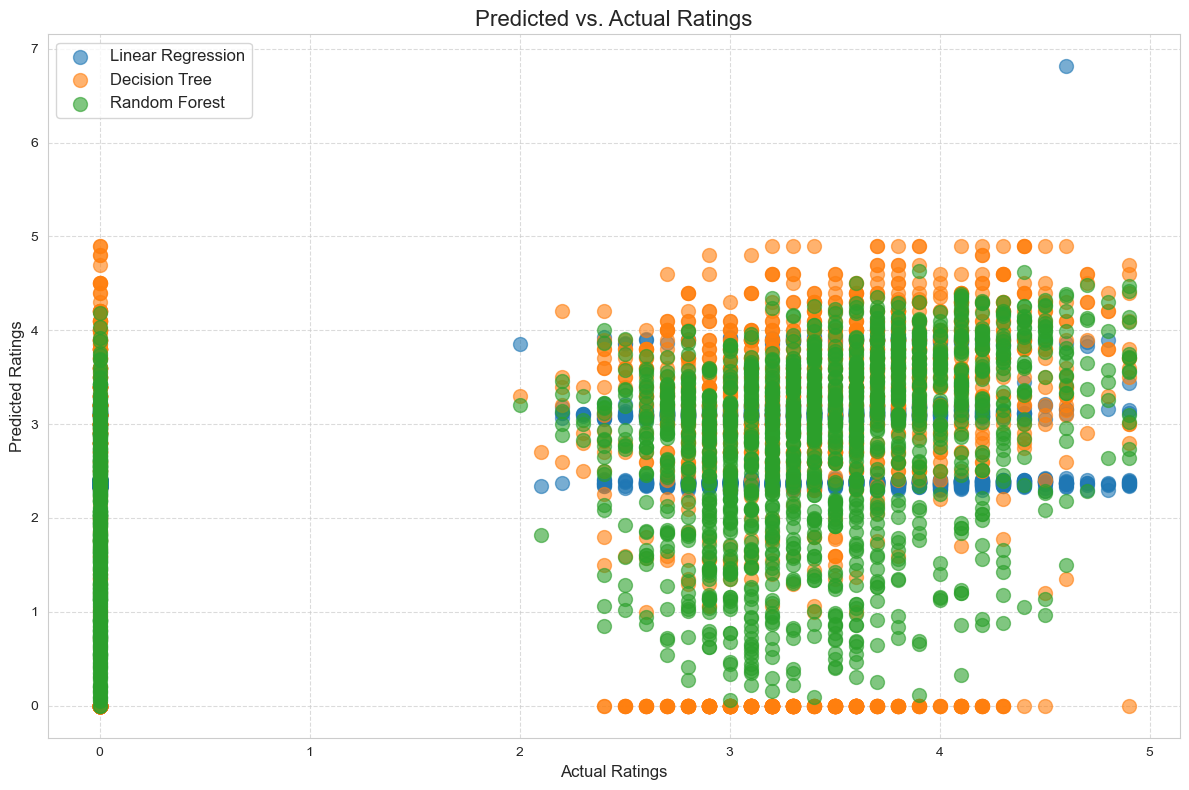

In [25]:
# Create a figure and axes with specified size
plt.figure(figsize=(12, 8))

# Create scatter plots for each model's predictions vs. actual ratings
plt.scatter(y_test, y_pred_linear, label='Linear Regression', alpha=0.6, s=100)
plt.scatter(y_test, y_pred_decision_tree, label='Decision Tree', alpha=0.6, s=100)
plt.scatter(y_test, y_pred_random_forest, label='Random Forest', alpha=0.6, s=100)

# Customize plot labels and legend
plt.xlabel('Actual Ratings', fontsize=12)
plt.ylabel('Predicted Ratings', fontsize=12)
plt.legend(fontsize=12)

# Set title and customize aesthetics
plt.title('Predicted vs. Actual Ratings', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()